#Домашнее задание № 13

#Алгоритмы кластеризации



In [1]:
# установим библиотеку
!pip install opencv-python

In [2]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import pandas as pd

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
# не хочет монтироваться)
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# попробуем по другому
!wget 'https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/Изображение_к_дз_по_Кластеризации_feml.jpg'

--2024-11-11 07:31:42--  https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B4%D0%B7_%D0%BF%D0%BE_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_feml.jpg
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107959 (105K) [image/jpeg]
Saving to: ‘Изображение_к_дз_по_Кластеризации_feml.jpg’

Изображение_к_дз_по 100%[===================>] 105.43K   193KB/s    in 0.5s    

2024-11-11 07:31:43 (193 KB/s) - ‘Изображение_к_дз_по_Кластеризации_feml.jpg’ saved [107959/107959]



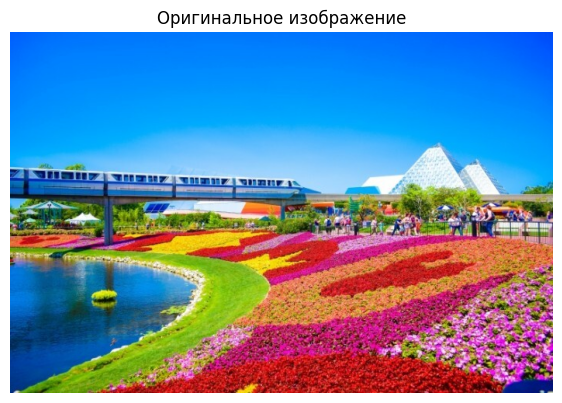

In [5]:
# посмотрим на нашу картинку
path = '/content/Изображение_к_дз_по_Кластеризации_feml.jpg'
img = cv2.imread(path)
draw_picture(img, 'Оригинальное изображение', bgr=True)

In [6]:
# посмотрим его размер
img.shape

(466, 700, 3)

In [7]:
# сохраним данные
x_report = []
y_report = []
i_report = []

x_report.append('original_img')
y_report.append(1)
i_report.append(img)

#2. Реализуем 3 модели кластеризации

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [8]:
# загрузим библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [10]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [11]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [12]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [13]:
set(target)

{0, 1}

In [14]:
len(target)

326200

In [15]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[ 73.91314714, 102.34056403, 163.61365452],
       [235.07008063, 145.3845234 ,  33.03973925]])

In [16]:
color_space[target]

array([[235.07008063, 145.3845234 ,  33.03973925],
       [235.07008063, 145.3845234 ,  33.03973925],
       [235.07008063, 145.3845234 ,  33.03973925],
       ...,
       [ 73.91314714, 102.34056403, 163.61365452],
       [ 73.91314714, 102.34056403, 163.61365452],
       [ 73.91314714, 102.34056403, 163.61365452]])

In [17]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [18]:
# проверим размер
output_image.shape

(466, 700, 3)

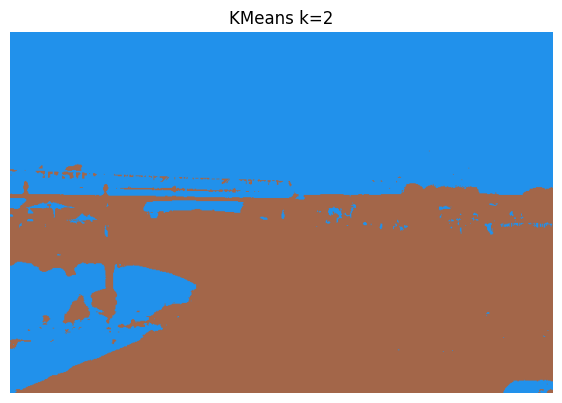

In [19]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

Попробуем оценить метрику SSIM.

In [20]:
from skimage.metrics import structural_similarity as ssim

In [21]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.7059157470434813

In [22]:
# сохраним данные
x_report.append('KMeans k=2')
y_report.append(ssim_skimg)
i_report.append(output_image)

k=5

In [23]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=original_image, reshaped_img=reshaped_img, k=2):

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return output_image_

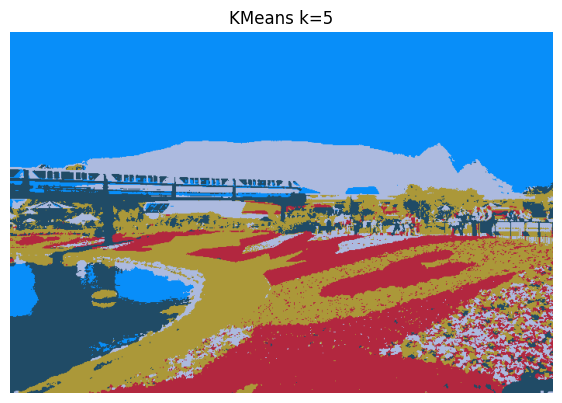

In [24]:
# посмотрим
output_image = KM_k(k=5)

In [25]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.8120180195863047

In [26]:
# сохраним данные
x_report.append('KMeans k=5')
y_report.append(ssim_skimg)
i_report.append(output_image)

k=10

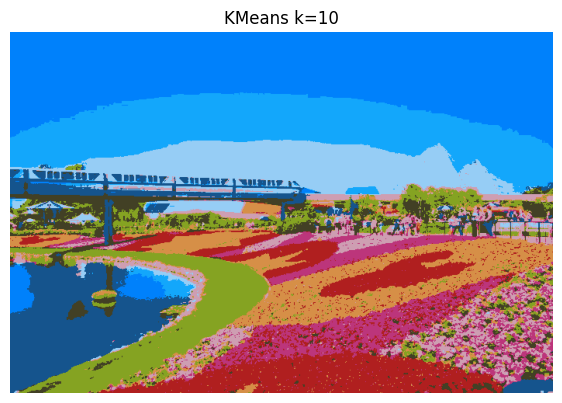

In [27]:
# посмотрим
output_image = KM_k(k=10)

In [28]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.8905681308737866

In [29]:
# сохраним данные
x_report.append('KMeans k=10')
y_report.append(ssim_skimg)
i_report.append(output_image)

k=20

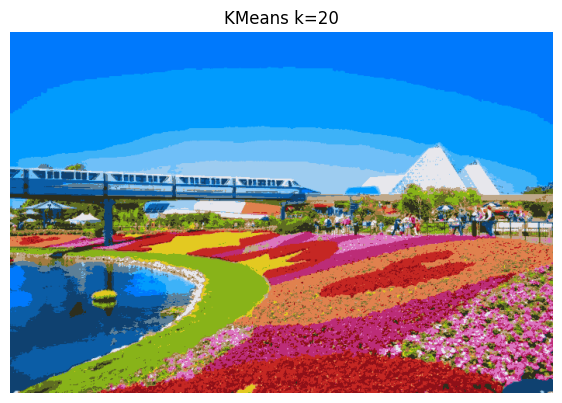

In [30]:
# посмотрим
output_image = KM_k(k=20)

In [31]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.9308371157812161

In [32]:
# сохраним данные
x_report.append('KMeans k=20')
y_report.append(ssim_skimg)
i_report.append(output_image)

b) DBSCAN

Для реализации модели придется сократить размер. Иначе оперативной памяти не хватит.

In [33]:
# зададим меньший размер
new_size = (img.shape[1]//2, img.shape[0]//2)
new_size

(350, 233)

In [34]:
# уменьшим размер
img = cv2.resize(img, dsize = new_size,
                  interpolation=cv2.INTER_CUBIC   # кубическая интерполяция
                 )

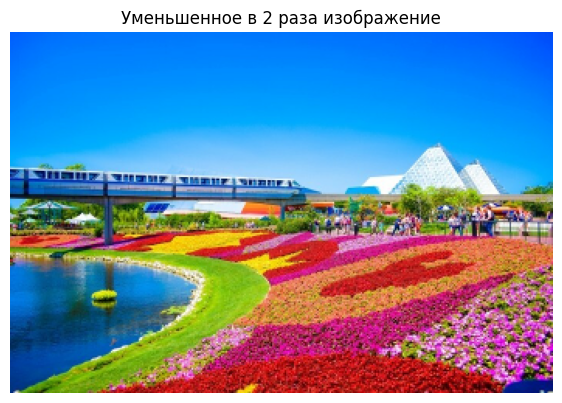

In [35]:
 # посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 2 раза изображение', bgr=True)

In [36]:
# проверим размер
img.shape

(233, 350, 3)

In [37]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [253,  93,   0],
       [253,  93,   0],
       ...,
       [166, 182, 172],
       [174, 191, 183],
       [172, 191, 180]], dtype=uint8)

In [38]:
# Создим объект DBSCAN
eps=8
min_samples=25
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

После многочисленных экспериментов это лучшее, что удалось подобрать.

In [39]:
# обучим модель
dbscan.fit(reshaped_img)
dbscan

DBSCAN(eps=8, min_samples=25)

In [40]:
# Получим предсказания
labels = dbscan.fit_predict(reshaped_img)
labels

array([ 0,  0,  0, ..., -1, -1, -1])

In [41]:
print('Итого найдено : {} кластеров'.format(len(set(labels))), np.unique(labels))

Итого найдено : 49 кластеров [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47]


DBSCAN не предполагвет наличие "центра" кластера. Поэтому для подбора цвета рассмотрим 2 модели.

In [42]:
# модель №1: для выбора цвета кластера "усредним" полученные значения

def get_color(reshaped_img=reshaped_img, labels=labels):

  # начнем строить наш df
  # с ним уже привычнее)
  import pandas as pd

  # это df нашего "плоского" фото
  df = pd.DataFrame(reshaped_img)

  # добавим найденные кластеры
  df['clusters'] = labels

  # усредним значения внутри кластеров
  df_ = df.groupby(['clusters']).mean().astype('uint8')

  # запомним наши цвета для раскраски
  color_space = np.stack((df_[0].to_numpy(),
                          df_[1].to_numpy(),
                          df_[2].to_numpy()),
                          axis=-1
                        )

  return color_space

In [43]:
# получим наши цвета
color_space = get_color()

In [44]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space[labels],
                            (img.shape[0], img.shape[1], 3)
                         )

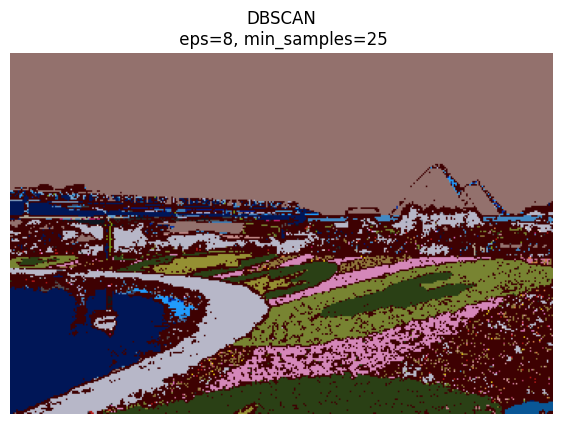

In [45]:
# посмотрим на нашу картинку
title = 'DBSCAN\n eps={}, min_samples={}'.format(eps, min_samples)
draw_picture(output_image, title, bgr=True)

In [46]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

-0.017330292145537062

In [47]:
# сохраним данные
x_report.append('DBSCAN_1')
y_report.append(ssim_skimg)
i_report.append(output_image)

In [48]:
# модель №2: получим значение цвета, например, из первого элемента каждого кластера
df = pd.DataFrame(reshaped_img)
df['clusters'] = labels
color_space_1 = []
for ele in np.unique(labels):
    color_space_1.append(df[df['clusters'] == ele].iloc[0].tolist()[:3])

color_space_1 = np.asarray(color_space_1)
color_space_1[:5]

array([[237, 167,  34],
       [255,  92,   0],
       [223, 168,  78],
       [214, 176, 128],
       [ 89,  26,   1]])

In [49]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space_1.astype('uint8')[labels],
                          (img.shape[0], img.shape[1], 3)
                         )

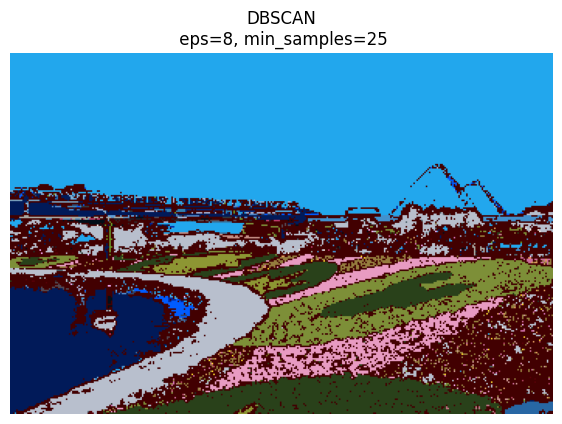

In [50]:
# посмотрим на нашу картинку
title = 'DBSCAN\n eps={}, min_samples={}'.format(eps, min_samples)
draw_picture(output_image, title, bgr=True)

По крайней мере с цветом неба тут мы угадали)

In [51]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.4910773438602766

In [52]:
# сохраним данные
x_report.append('DBSCAN_2')
y_report.append(ssim_skimg)
i_report.append(output_image)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.

Практика показывает, что изображение необходимо еще больше сжать

In [53]:
# зададим меньший размер
new_size = (img.shape[1]//2, img.shape[0]//2)
new_size

(175, 116)

In [54]:
# уменьшим размер
img = cv2.resize(img, dsize = new_size,
                  interpolation=cv2.INTER_CUBIC   # кубическая интерполяция
                 )

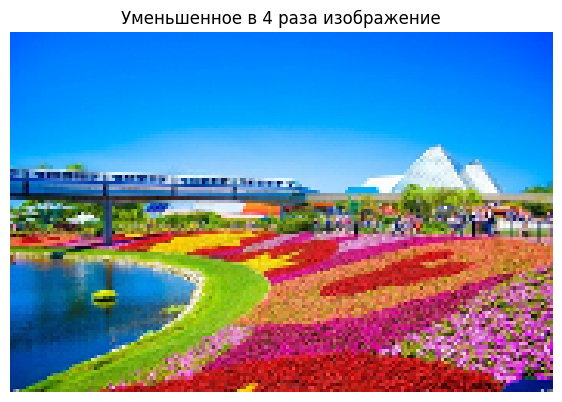

In [55]:
 # посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 4 раза изображение', bgr=True)

In [56]:
# проверим размер
img.shape

(116, 175, 3)

In [57]:
from sklearn.cluster import AgglomerativeClustering

k=2

In [58]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
                          ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[254,  93,   0],
       [254,  94,   0],
       [253,  95,   0],
       ...,
       [117,  31,   0],
       [127,  90,  75],
       [128, 114, 107]], dtype=uint8)

In [59]:
# построим модель
clustering = AgglomerativeClustering(n_clusters=2)

In [60]:
# обучим модель
clustering.fit(reshaped_img)
clustering

AgglomerativeClustering()

In [61]:
# получим кластеры
labels = clustering.labels_
labels

array([0, 0, 0, ..., 0, 0, 1])

In [62]:
print('Итого найдено : {} кластеров'.format(len(set(labels))), np.unique(labels))

Итого найдено : 2 кластеров [0 1]


In [63]:
# получим наши цвета
# вариант 1
color_space = get_color()

In [64]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space[labels],
                            (img.shape[0], img.shape[1], 3)
                         )

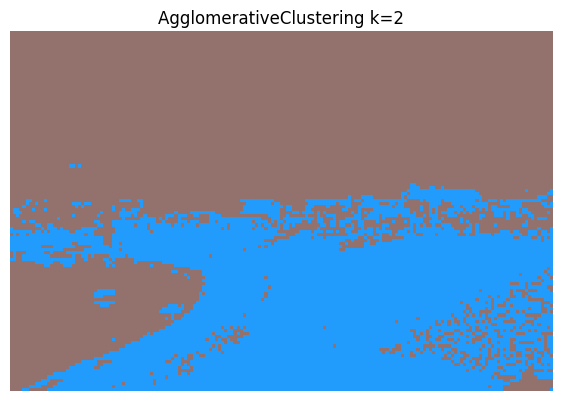

In [65]:
# посмотрим на нашу картинку
title = 'AgglomerativeClustering k=2'
draw_picture(output_image, title, bgr=True)

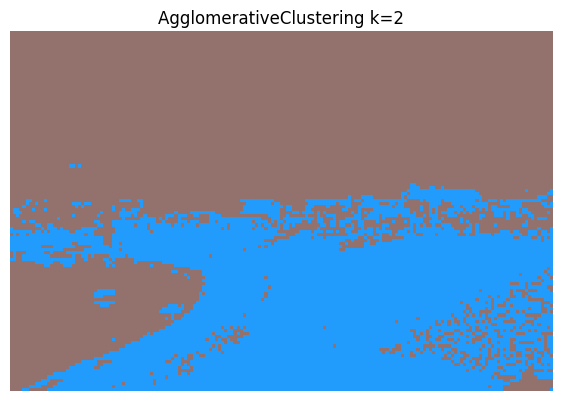

In [66]:
# вариант 2

# получим цвета
color_space_1 = []
for ele in np.unique(target):
    color_space_1.append(df[df['clusters'] == ele].iloc[0].tolist()[:3])

color_space_1 = np.asarray(color_space_1)

# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space[labels],
                            (img.shape[0], img.shape[1], 3)
                         )

# посмотрим на нашу картинку
title = 'AgglomerativeClustering k=2'
draw_picture(output_image, title, bgr=True)

In [67]:
# построим функцию для дальнейшей работы

def AC_k(k=2):

  # построим модель
  clustering = AgglomerativeClustering(n_clusters=k)
  # обучим модель
  clustering.fit(reshaped_img)
  # получим кластеры
  labels = clustering.labels_

  # вариант 1
  # получим наши цвета
  color_space = get_color()
  # вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
  output_image = np.reshape(color_space[labels],
                            (img.shape[0], img.shape[1], 3)
                           )
  # посмотрим на нашу картинку
  title = 'AgglomerativeClustering k={}'.format(k)
  draw_picture(output_image, title, bgr=True)

  # вариант 2
  # практика показала, что в случае этой модели разницы по цветам нет

  return output_image

In [68]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

-0.4187766542491823

In [69]:
# сохраним данные
x_report.append('Aggl_Clust k=2')
y_report.append(ssim_skimg)
i_report.append(output_image)

k=5

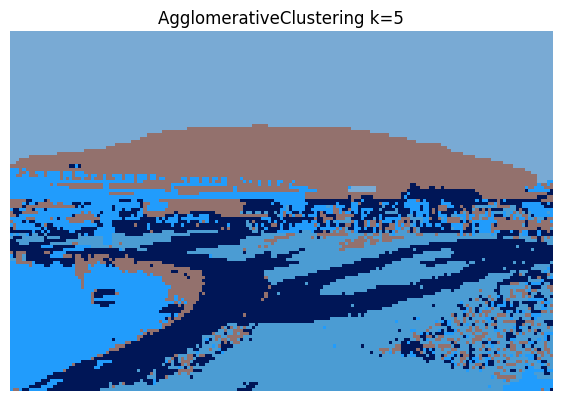

In [70]:
output_image = AC_k(k=5)

In [71]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.029849759510709853

In [72]:
# сохраним данные
x_report.append('Aggl_Clust k=5')
y_report.append(ssim_skimg)
i_report.append(output_image)

k=10

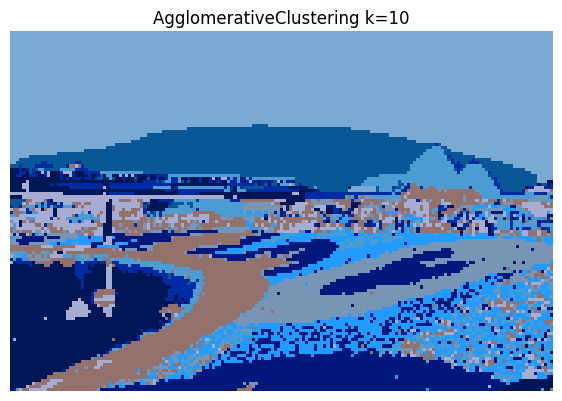

In [73]:
output_image = AC_k(k=10)

In [74]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.21437309803900353

In [75]:
# сохраним данные
x_report.append('Aggl_Clust k=10')
y_report.append(ssim_skimg)
i_report.append(output_image)

k=20

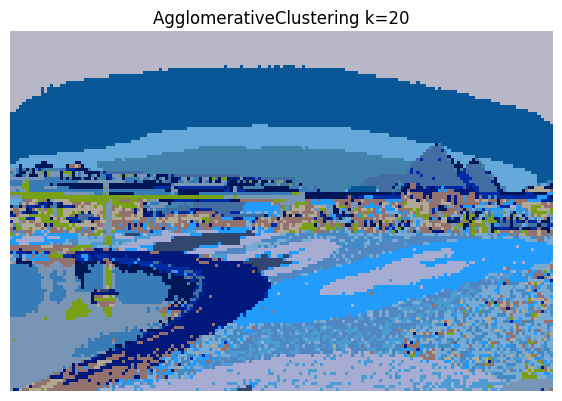

In [76]:
output_image = AC_k(k=20)

In [77]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.10843246611109264

In [78]:
# сохраним данные
x_report.append('Aggl_Clust k=20')
y_report.append(ssim_skimg)
i_report.append(output_image)

Ну и ради спортивного интереса.

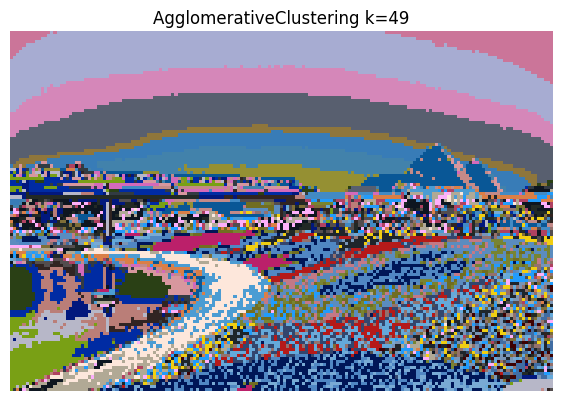

In [79]:
output_image = AC_k(k=49)

Совсем все весело!)

In [80]:
# оценка SSIM
ssim_skimg = ssim(img, output_image, win_size=3)
ssim_skimg

0.046369198511522436

In [81]:
# сохраним данные
x_report.append('Aggl_Clust k=48')
y_report.append(ssim_skimg)
i_report.append(output_image)

In [82]:
x_report

['original_img',
 'KMeans k=2',
 'KMeans k=5',
 'KMeans k=10',
 'KMeans k=20',
 'DBSCAN_1',
 'DBSCAN_2',
 'Aggl_Clust k=2',
 'Aggl_Clust k=5',
 'Aggl_Clust k=10',
 'Aggl_Clust k=20',
 'Aggl_Clust k=48']